In [1]:
import zipfile
import os

# Use raw string to safely handle spaces and backslashes
zip_path = r"C:\Users\HP\OneDrive\Desktop\COMPANY ASSIGNMENT\Task 2 - Change Detection Algorithm-20250622T060247Z-1-001.zip"
extract_path = "task_2_data"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Successfully extracted to:", extract_path)


✅ Successfully extracted to: task_2_data


In [2]:
from glob import glob
import os

# Based on extracted structure
input_folder = "task_2_data/Task 2 - Change Detection Algorithm/input-images"

# List all image files
all_images = sorted(glob(os.path.join(input_folder, "*.jpg")))

# Separate before (X.jpg) and after (X~2.jpg)
before_images = [f for f in all_images if "~2" not in f]
after_images = [f for f in all_images if "~2" in f]

# Show counts and sample file names
print("✅ Found", len(before_images), "before images")
print("✅ Found", len(after_images), "after images")

if before_images and after_images:
    print("📁 Sample before image:", os.path.basename(before_images[0]))
    print("📁 Sample after image: ", os.path.basename(after_images[0]))
else:
    print("⚠️ Could not find image files. Please recheck input path.")


✅ Found 15 before images
✅ Found 15 after images
📁 Sample before image: 1.jpg
📁 Sample after image:  10~2.jpg


In [3]:
import cv2
import numpy as np

# Define output directory
output_folder = "task_2_output"
os.makedirs(output_folder, exist_ok=True)

for before_path in before_images:
    base_name = os.path.basename(before_path).replace(".jpg", "")
    after_path = os.path.join(input_folder, base_name + "~2.jpg")

    if not os.path.exists(after_path):
        print(f"❌ After image not found for {base_name}")
        continue

    # Load images
    before = cv2.imread(before_path)
    after = cv2.imread(after_path)

    # Convert to grayscale
    gray_before = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    gray_after = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray_before, gray_after)

    # Threshold to binary
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Clean noise with morphological ops
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw boxes on a copy of after image
    annotated = after.copy()
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w * h > 300:  # ignore tiny regions
            cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Save as X~3.jpg
    output_path = os.path.join(output_folder, base_name + "~3.jpg")
    cv2.imwrite(output_path, annotated)
    print(f"✅ Saved: {output_path}")


✅ Saved: task_2_output\1~3.jpg
✅ Saved: task_2_output\10~3.jpg
✅ Saved: task_2_output\11~3.jpg
✅ Saved: task_2_output\12~3.jpg
✅ Saved: task_2_output\13~3.jpg
✅ Saved: task_2_output\15~3.jpg
✅ Saved: task_2_output\16~3.jpg
✅ Saved: task_2_output\17~3.jpg
✅ Saved: task_2_output\18~3.jpg
✅ Saved: task_2_output\2~3.jpg
✅ Saved: task_2_output\3~3.jpg
✅ Saved: task_2_output\5~3.jpg
✅ Saved: task_2_output\6~3.jpg
✅ Saved: task_2_output\7~3.jpg
✅ Saved: task_2_output\9~3.jpg


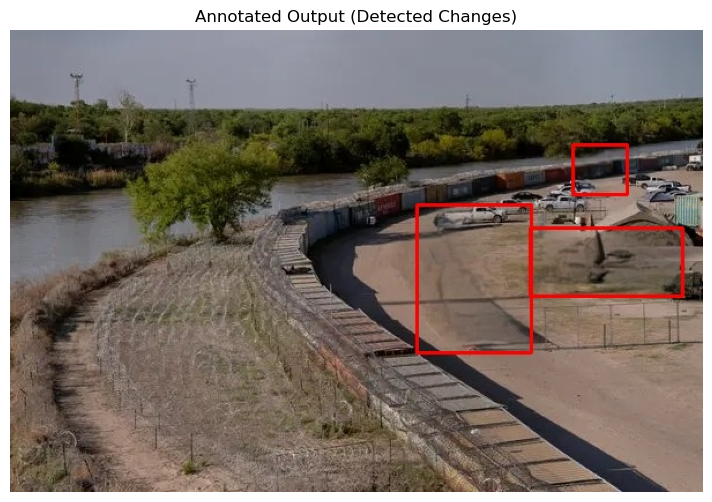

In [4]:
import matplotlib.pyplot as plt
import cv2

# Load one sample output
sample_output = os.path.join(output_folder, "1~3.jpg")  # or replace with any X~3.jpg file
img = cv2.imread(sample_output)

# Show using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Annotated Output (Detected Changes)")
plt.axis('off')
plt.show()


In [5]:
import shutil
import os

# Paths
input_path = "task_2_data/Task 2 - Change Detection Algorithm/input-images"
output_path = "task_2_output"

# Copy only X.jpg (before images) into output
for filename in os.listdir(input_path):
    if filename.endswith(".jpg") and "~2" not in filename:
        full_src = os.path.join(input_path, filename)
        full_dst = os.path.join(output_path, filename)
        shutil.copy2(full_src, full_dst)

print("✅ Before images copied to task_2_output/")


✅ Before images copied to task_2_output/
